# CountFrequencyEncoder
<p>The CountFrequencyEncoder() replaces categories by the count of
observations per category or by the percentage of observations per category.<br>
For example in the variable colour, if 10 observations are blue, blue will
be replaced by 10. Alternatively, if 10% of the observations are blue, blue
will be replaced by 0.1.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from feature_engine.encoding import CountFrequencyEncoder

In [2]:
# Load titanic dataset from OpenML

def load_titanic(filepath='titanic.csv'):
    # data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')
    data = pd.read_csv(filepath)
    data = data.replace('?', np.nan)
    data['cabin'] = data['cabin'].astype(str).str[0]
    data['pclass'] = data['pclass'].astype('O')
    data['age'] = data['age'].astype('float').fillna(data.age.median())
    data['fare'] = data['fare'].astype('float').fillna(data.fare.median())
    data['embarked'].fillna('C', inplace=True)
    # data.drop(labels=['boat', 'body', 'home.dest', 'name', 'ticket'], axis=1, inplace=True)
    return data

In [3]:
# data = load_titanic("../data/titanic.csv")
data = load_titanic("../data/titanic-2/Titanic-Dataset.csv")
data.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,n,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,n,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,n,S


In [4]:
X = data.drop(['survived', 'name', 'ticket'], axis=1)
y = data.survived

In [5]:
# we will encode the below variables, they have no missing values
X[['cabin', 'pclass', 'embarked']].isnull().sum()

cabin       0
pclass      0
embarked    0
dtype: int64

In [6]:
''' Make sure that the variables are type (object).
if not, cast it as object , otherwise the transformer will either send an error (if we pass it as argument) 
or not pick it up (if we leave variables=None). '''

X[['cabin', 'pclass', 'embarked']].dtypes

cabin       object
pclass      object
embarked    object
dtype: object

In [7]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((623, 9), (268, 9))

The CountFrequencyEncoder(), replaces the categories by the count or frequency of the observations in the train set for that category. 

If we select "count" in the encoding_method, then for the variable colour, if there are 10 observations in the train set that show colour blue, blue will be replaced by 10.<br><br> Alternatively, if we select "frequency" in the encoding_method, if 10% of the observations in the train set show blue colour, then blue will be replaced by 0.1.

### Frequency

Labels are replaced by the percentage of the observations that show that label in the train set.

In [8]:
'''
Parameters
----------

encoding_method : str, default='count' 
                Desired method of encoding.

        'count': number of observations per category
        
        'frequency': percentage of observations per category

variables : list
          The list of categorical variables that will be encoded. If None, the 
          encoder will find and transform all object type variables.
'''
count_encoder = CountFrequencyEncoder(encoding_method='frequency',
                                      variables=['cabin', 'pclass', 'embarked'])

count_encoder.fit(X_train)

CountFrequencyEncoder(encoding_method='frequency',
                      variables=['cabin', 'pclass', 'embarked'])

In [9]:
# we can explore the encoder_dict_ to find out the category replacements.
count_encoder.encoder_dict_

{'cabin': {'n': 0.7560192616372392,
  'C': 0.06741573033707865,
  'B': 0.04975922953451043,
  'E': 0.04333868378812199,
  'D': 0.04173354735152488,
  'A': 0.02247191011235955,
  'F': 0.014446227929373997,
  'G': 0.0032102728731942215,
  'T': 0.0016051364365971107},
 'pclass': {3: 0.5377207062600321,
  1: 0.2504012841091493,
  2: 0.21187800963081863},
 'embarked': {'S': 0.7335473515248796,
  'C': 0.17656500802568217,
  'Q': 0.0898876404494382}}

In [10]:
# transform the data: see the change in the head view
train_t = count_encoder.transform(X_train)
test_t = count_encoder.transform(X_test)
test_t.head()

,passengerid,pclass,sex,age,sibsp,parch,fare,cabin,embarked
495,496,0.537721,male,28.0,0,0,14.4583,0.756019,0.176565
648,649,0.537721,male,28.0,0,0,7.5500,0.756019,0.733547
278,279,0.537721,male,7.0,4,1,29.1250,0.756019,0.089888
31,32,0.250401,female,28.0,1,0,146.5208,0.049759,0.176565
255,256,0.537721,female,29.0,0,2,15.2458,0.756019,0.176565


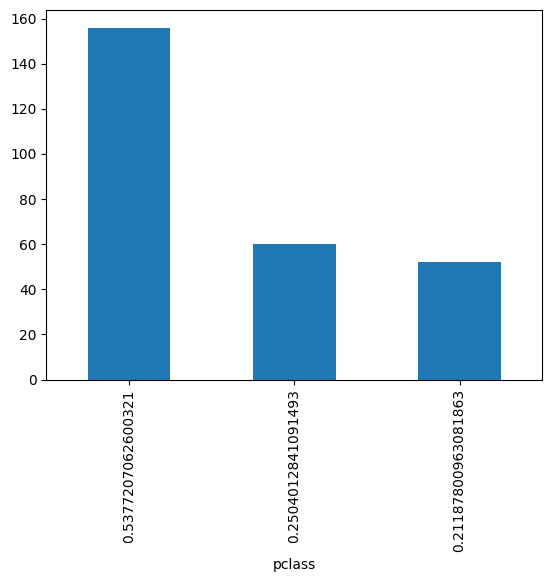

In [11]:
test_t['pclass'].value_counts().plot.bar()
plt.show()

In [12]:
test_orig = count_encoder.inverse_transform(test_t)
test_orig.head()

,passengerid,pclass,sex,age,sibsp,parch,fare,cabin,embarked
495,496,3,male,28.0,0,0,14.4583,n,C
648,649,3,male,28.0,0,0,7.5500,n,S
278,279,3,male,7.0,4,1,29.1250,n,Q
31,32,1,female,28.0,1,0,146.5208,B,C
255,256,3,female,29.0,0,2,15.2458,n,C


### Count

Labels are replaced by the number of the observations that show that label in the train set.

In [13]:
# this time we encode only 1 variable

count_enc = CountFrequencyEncoder(encoding_method='count',
                                                variables='cabin')

count_enc.fit(X_train)

CountFrequencyEncoder(variables='cabin')

In [14]:
# we can find the mappings in the encoder_dict_ attribute.

count_enc.encoder_dict_

{'cabin': {'n': 471,
  'C': 42,
  'B': 31,
  'E': 27,
  'D': 26,
  'A': 14,
  'F': 9,
  'G': 2,
  'T': 1}}

In [15]:
# transform the data: see the change in the head view for Cabin

train_t = count_enc.transform(X_train)
test_t = count_enc.transform(X_test)

test_t.head()

,passengerid,pclass,sex,age,sibsp,parch,fare,cabin,embarked
495,496,3,male,28.0,0,0,14.4583,471,C
648,649,3,male,28.0,0,0,7.5500,471,S
278,279,3,male,7.0,4,1,29.1250,471,Q
31,32,1,female,28.0,1,0,146.5208,31,C
255,256,3,female,29.0,0,2,15.2458,471,C


### Select categorical variables automatically

If we don't indicate which variables we want to encode, the encoder will find all categorical variables

In [16]:
# this time we ommit the argument for variable
count_enc = CountFrequencyEncoder(encoding_method = 'count')

count_enc.fit(X_train)

CountFrequencyEncoder()

In [17]:
# we can see that the encoder selected automatically all the categorical variables

count_enc.variables

In [18]:
# transform the data: see the change in the head view

train_t = count_enc.transform(X_train)
test_t = count_enc.transform(X_test)

test_t.head()

,passengerid,pclass,sex,age,sibsp,parch,fare,cabin,embarked
495,496,335,408,28.0,0,0,14.4583,471,110
648,649,335,408,28.0,0,0,7.5500,471,457
278,279,335,408,7.0,4,1,29.1250,471,56
31,32,156,215,28.0,1,0,146.5208,31,110
255,256,335,215,29.0,0,2,15.2458,471,110


### Note
if there are labels in the test set that were not present in the train set, the transformer will introduce NaN, and raise a warning.